# Assignment 7: Ant Colony Optimization for Network Route Repair

### Assignment description:

In this assignment you will use a implementation of the ant colony optimization algorithm described in Chandrasekhar et al. paper,  "A distributed algorithm to maintain and repair the trail networks of arboreal ants,"  to repair breaks for a variety of graphs. While you will not be responsible for writing the algorithm, in this assignment you will run experiments over different problem instances and parameterizations. 

### Assignment goals:

1. Use and apply the ant colony optimization algorithm
2. Plot and evaluate your results over a series of experimental runs

### Assignment question overview:

1. Write a function to calculate the success rate. [Question 1](#question1)
2. Write a function to find the optimial parameterization. [Question 2](#question2)


## Ant Colony Optimization Algorithm

The algorithm we will be using was written by Dr. Joshua Daymude and was adapted from the implementation used in Chandrasekhar et al. You have been given this program, and its path is ``./trailrepair.py``. We suggest that you review the python code before running your experiments to gain a high-level understanding of what is happening under the hood. 

### Parameterization

As mentioned in the trail repair paper (Chandrasekhar et al.), there are both computational and biological parameters that comprise the algorithm. We will first look at the computational parameters. All parameters are passed as arguments to the python code, that is, you first include the flag and then the parameter value. How this works will be shown later in an example.  Here are the computational parameters:


- `-g` or `--g_top` Graph topology, one of: [minimal | simple | medium | full | spanning | euroroad | chicago | uspower | paroad |caroad]
- `-R` or `--runs` Number of runs
- `-T` or `--steps` Number of time steps
- `-N` or `--ants` Number of ants
- `-C` or `--cut` Index of cut edge
- `-V` or `--size` Number of vertices in subgraph samples


In addition to the parameters, there are some options provided by the argument parser.

- `-E` or `--extra` Use the variant with extra ants at the nests
- `-D` or `--draw` Output the trail network at the specified iteration (saved to `/images` directory)

Finally, you are given the option to adjust the three biological parameters discussed in the paper, $q_{\text{add}}$, $q_{\text{decay}}$, and $q_{\text{explore}}$. For more information on these parameters, please refer to the trail repair lecture or the paper. These parameters are passed to the argument parser using the following definitions. 

- `-A` or `--add` Amount of pheromone to add on a traveled edge
- `-Q` or `--decay` Fraction of pheromone that evaporates per time step
- `-X` or `--explore` Probability that an ant takes an explore step

## Reproducing Chandrasekhar Results

In this section, we will focus on reproducing the experiments in the paper "A distributed algorithm to maintain
and repair the trail networks of arboreal ants." 

### Input Graph Topolgies

Recall that the original trail repair paper experimented on five graphs of increasing difficulty. These graphs are as follows: minimal graph, simple graph, medium graph, full grid, spanning graph. The paths to each respective graph are given below. For this assignment, you are asked to experiment with only three of them: MINIMAL, MEDIUM, SPANNING.  Note that when you pass the graph to the python code you will not need to provide the path but rather the symbolic name from the following list: [minimal | simple | medium | full | spanning | euroroad | chicago | uspower | paroad |caroad]. Although you are asked only to submit the assignment for three graphs for this question, we provide access to all of them, in case you find it useful or wish to experiment on your own.

- `data/g_minimal.txt` 
- `data/g_simple.txt`
- `data/g_medium.txt`
- `data/g_full.txt`
- `data/g_spanning`

The series of figures below shows what these topolgies look like after an attempted path reapir. The graphs are drawn to show only the actual edges; you may notice that this is slightly different from the visual representation shown in the paper, but the topolgies are the same.


<table><tr>  
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="static_images/g_minimal_r0.png" width="250">
    <br>
    <em style="color: grey">Figure 1: Example minimal graph after an attempted path repair.</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="static_images/g_simple_r0.png" width="250">
    <br>
    <em style="color: grey">Figure 2: Example simple graph after an attempted path repair.</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="static_images/g_medium_r0.png" width="250">
    <br>
    <em style="color: grey">Figure 3: Example medium graph after an attempted path repair.</em>
  </p> 
</td>    
</tr></table>
<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="static_images/g_full_r0.png" width="250">
    <br>
    <em style="color: grey">Figure 4: Example full graph after an attempted path repair.</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="static_images/g_spanning_r0.png" width="250">
    <br>
    <em style="color: grey">Figure 5: Example spanning graph after an attempted path repair.</em>
  </p> 
</td> 
</tr></table>

### Experimentation 

For this assignment we will be recreating the results for success probability. In the results section of the Chandrasekhar there is a $32 \times 32$ grid showing the results from 1024 tests ran for each combination of decay and explore probabilites. Since this would longer to run than Coursera allows, we will use a $3 \times 3$ grid to create heat maps.

As in the trail repair paper, we will vary the decay parameter in the interval $q_{\text{decay}}\in [0.01, 0.30]$ and the explore probability $q_{\text{explore}}\in [0.10, 0.40]$. As for the other parameters, we will use those that are defaulted in the code. These default parameters are the same that are in the original paper.

### Running the Code

You can run the code by calling python within this notebook. The code snipit below shows how to call the code on a minimal graph topology, a decay value of 0.01, a explore probability of 0.10.

``python3 trailrepair.py -g minimal --decay 0.01 --explore 0.10``

This code will return True if the ants successfully repaired the trail and False otherwise.

<!-- Please note that Coursera imposes strict time limits on session run times, so it is advised that when developing the assignment, you complete your test runs by grouping each graph topology in its own session.  -->

<a id='question1'></a>
## Question 1:

Your first task is to write the function `success_rate(graph, decay, explore)` that returns the success rate for a given graph. Just like in the paper, you will need to repeat the simulation 15 times to estimate the success rate. That is the success rate will be the total number of successes divided by 15. 

The following function call should return the success rate for the minimal graph topology, a decay value of 0.01, and a explore probability of 0.10.

`success_rate(minimal, 0.01, 0.10)`

You should use `subprocess` as seen in the negative selection assignment to run trailrepair.py with the appropriate arguments. We have included the necessary imports for doing so below. Note that you will need to parse the result.stdout (it is given as text with a newline character, so direct comparison to, e.g., True will not work).

In [6]:
import sys
import subprocess
from subprocess import run, PIPE
from io import StringIO

def success_rate(graph, decay, explore):
    successes = 0
    total = 15
    for _ in range(total):
        result = subprocess.run(['python3', 'trailrepair.py', '-g', str(graph), '--decay', str(decay), '--explore', str(explore)], stdout = subprocess.PIPE, text = True)
    if result.stdout.strip() == 'True':
        successes += 1
    return successes / total
    '''
    Function to find the success rate for a given graph topology.
    Inputs: 
        graph: graph topology, one of: [minimal | simple | medium | full | spanning | euroroad | chicago | uspower | paroad |caroad]
        decay: fraction of pheromone that evaporates per time step
        explore: probability that an ant takes an explore step
    Output:
        success_rate: average number of successes over 15 trials
    '''
    
    # your code here
    

#     return success_rate

0.06666666666666667


<a id='question2'></a>
## Question 2:

Next, you will use the function you wrote in Question 1 to generate a heat map and use it to identify the explore and decay parameters that maximize the success rate. Write the function `max_success(graph)` that plots a heat map similar to that in the Chandrasekhar paper. The heat map will be $3\times 3$ (10x10 is more realistic, but will not work on our course platform) and the parameter values will be in the following intervals, $q_{\text{decay}}\in [0.01, 0.30]$, using a step size of 0.145, and $q_{\text{explore}}\in [0.10, 0.40]$ using a step size of 0.15. The function will return a tuple `(decay, explore)` containing the values of $q_{\text{decay}}$ and $q_{\text{explore}}$ parameters that maximize the success rate.

For the heatmap, we suggest using``seaborn`` which will be included for you along with other packages that may be helpful. So, if you have an ndarray (3x3) from, for example, running `shaped_success = np.reshape(success_array, (3,3))`, you can call `sns.heatmap(shaped_success)` to visualize it.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def max_success(graph):
    decay_values = np.arange(0.01, 0.3, 0.145)
    explore_values = np.arange(0.1, 0.4, 0.15)
    success_rates = np.zeros((len(decay_values), len(explore_values)))
    for i, decay in enumerate(decay_values):
        for j, explore in enumerate(explore_values):
            success_rate_value = success_rate(graph, decay, explore)
            success_rates[i,j] = success_rate_value
    decay_labels = [f"{d:.2f}" for d in decay_values]
    explore_labels =[f"{e:.2f}" for e in explore_values]
    heatmap_data = pd.DataFrame(success_rates, index = decay_labels, columns = explore_labels)
    sns.heatmap(heatmap_data, annot = True)
    plt.title(f"Success Rate Heatmap for {graph} Graph")
    plt.xlabel("Explore Probability")
    plt.ylabel("Decay Rate")
    plt.show()
    
    max_index = np.unravel_index(success_rates.argmax(), success_rates.shape)
    max_decay = decay_values[max_index[0]]
    max_explore = explore_values[max_index[1]]
    decay_explore = (max_decay, max_explore)
    return decay_explore
    '''
    Function that plots a heatmap of success rates and returns the parameters that maximize success.
    Input:
        graph: graph topology, one of: [minimal | simple | medium | full | spanning | euroroad | chicago | uspower | paroad |caroad]
    Output:
        decay_explore: tuple of decay and explore parameters that maximize success rate
    '''
    

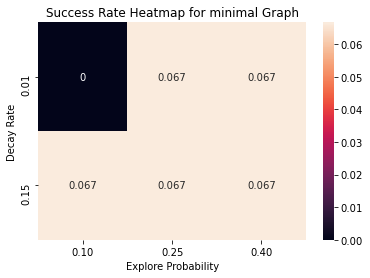

In [8]:
'''THIS IS A TEST CELL. RUN THIS WITH A 3x3 HEATMAP TO VERIFY CODE.'''
n = max_success("minimal")
assert (n == (0.01, 0.25) or n == (0.155, 0.25))

In [9]:
print(n)

(0.01, 0.25)


In [10]:
'''
THIS IS A TEST CELL, RUN ME!
'''


'\nTHIS IS A TEST CELL, RUN ME!\n'

In [11]:
'''
THIS IS A TEST CELL, RUN ME!
'''


'\nTHIS IS A TEST CELL, RUN ME!\n'

In [12]:
'''
THIS IS A TEST CELL, RUN ME!
'''


'\nTHIS IS A TEST CELL, RUN ME!\n'